In [1]:
from datetime import date
import pandas as pd
import yfinance as yf
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates


def download_dataframe(list_securities, save_path, start_date = pd.to_datetime('2007-01-03'), end_date = pd.to_datetime('2021-01-03')):
    '''
    Input:
    list_security = list of security to download
    save_path = path where saving the .csv file 
    start_date = first date the programm download the data
    end_date = end date the programm download the data
    
    Output:
    pandas dataframe with 2 column indexes. The first one regards the ETFS, the second is about the holcv
    '''
    d = {}
    for security in list_securities:
        df = pd.DataFrame()
        SEC = yf.Ticker(security)
        if start_date:
            sec_df = SEC.history(start = start_date, end = end_date)
        else:    
            sec_df = SEC.history(period="max")
        sec_df.drop(columns = ['Dividends', 'Stock Splits'], inplace = True)
        d[security] = sec_df
    df = pd.concat(d,axis=1)
    df.to_csv(save_path)
    return df

In [4]:
download_dataframe(['SPY', 'DIA', 'QQQ', 'MDY', 'IJR', 'IWC'], '../data/key_market_USequties.csv', start_date = pd.to_datetime('2006-01-03'), end_date  = pd.to_datetime('2021-01-03'))
download_dataframe(['ACWI', 'ADRE', 'SPDW', 'VEA', 'IEFA'], '../data/key_market_GLOBequties.csv',start_date = pd.to_datetime('2006-01-03'), end_date  = pd.to_datetime('2021-01-03'))
download_dataframe(['TLT', 'BND', 'TIP', 'PHB', 'BWX', 'VCSH'], '../data/key_market_bonds.csv', start_date = pd.to_datetime('2006-01-03'), end_date  = pd.to_datetime('2021-01-03'))
download_dataframe(['DBB', 'GLD', 'SLV', 'PPLT', 'DBA', 'DBO', 'UNG', 'CORN', 'SOYB'], '../data/key_market_commodities.csv', start_date = pd.to_datetime('2006-01-03'), end_date  = pd.to_datetime('2021-01-03'))
download_dataframe(['UUP', 'CYB', 'FXB', 'FXE', 'FXY'], '../data/key_market_currencies.csv', start_date = pd.to_datetime('2006-01-03'), end_date  = pd.to_datetime('2021-01-03'))

- IEFA: No data found for this date range, symbol may be delisted


KeyError: "['Dividends', 'Stock Splits'] not found in axis"

In [2]:
US_equity = pd.read_csv('../data/key_market_USequties.csv', index_col = 0, header = [0,1])
global_equity = pd.read_csv('../data/key_market_GLOBequties.csv', index_col = 0, header = [0,1])
bonds = pd.read_csv('../data/key_market_bonds.csv', index_col = 0, header = [0,1])
currencies = pd.read_csv('../data/key_market_currencies.csv', index_col = 0, header = [0,1])
commodities = pd.read_csv('../data/key_market_commodities.csv', index_col = 0, header = [0,1])

In [3]:
df_tot = pd.concat([US_equity, global_equity, bonds, currencies, commodities], axis = 1)
df_tot

SPY                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2006-01-03   90.687081   91.998235   90.107562   91.780914  73256700   
2006-01-04   91.896825   92.353192   91.780919   92.215561  51899600   
2006-01-05   92.106906   92.425636   91.911316   92.273514  47307500   
2006-01-06   92.737145   93.142804   92.259041   93.041389  62885900   
2006-01-09   93.026891   93.490504   92.997920   93.280434  43527400   
...                ...         ...         ...         ...       ...   
2020-12-24  360.555642  361.486234  359.938545  361.456848  26457900   
2020-12-28  364.140840  364.973470  363.484553  364.562073  39000400   
2020-12-29  366.168544  366.354663  363.249451  363.866577  53680500   
2020-12-30  364.728624  365.473098  363.974375  364.385773  49455300   
2020-12-31  364.180014  367.001145  363.641269  366.237091  78520700   

                   DIA                                                ...  \
                  Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2006-01-03   73.239786   74.003265   72.762606   73.846481   9761900  ...   
2006-01-04   73.914657   74.207780   73.805586   74.125977   5844500  ...   
2006-01-05   73.969262   74.316916   73.867009   74.221481   4843600  ...   
2006-01-06   74.528169   74.780387   74.139611   74.657684   9017800  ...   
2006-01-09   74.644119   75.128113   74.623670   74.971329  10420700  ...   
...                ...         ...         ...         ...       ...  ...   
2020-12-24  293.817464  294.246028  293.106432  294.168091   1955700  ...   
2020-12-28  295.794680  297.216715  295.463523  296.096619   2382400  ...   
2020-12-29  297.489526  297.752525  294.772080  295.570740   2319600  ...   
2020-12-30  296.203768  297.197269  295.960267  296.223267   2081300  ...   
2020-12-31  296.096646  298.327119  295.463551  297.840118   2797000  ...   

             CORN                                      SOYB             \
             Open   High    Low  Close    Volume       Open       High   
Date                                                                     
2006-01-03    NaN    NaN    NaN    NaN       NaN        NaN        NaN   
2006-01-04    NaN    NaN    NaN    NaN       NaN        NaN        NaN   
2006-01-05    NaN    NaN    NaN    NaN       NaN        NaN        NaN   
2006-01-06    NaN    NaN    NaN    NaN       NaN        NaN        NaN   
2006-01-09    NaN    NaN    NaN    NaN       NaN        NaN        NaN   
...           ...    ...    ...    ...       ...        ...        ...   
2020-12-24  14.71  14.76  14.69  14.76   64600.0  18.969999  18.969999   
2020-12-28  14.80  14.90  14.71  14.89  209900.0  19.160000  19.160000   
2020-12-29  14.82  15.15  14.82  15.13  236300.0  18.719999  19.330000   
2020-12-30  15.10  15.35  15.08  15.30  269700.0  19.209999  19.400000   
2020-12-31  15.45  15.60  15.36  15.58  326400.0  19.570000  19.580000   

                                            
                  Low      Close    Volume  
Date                                        
2006-01-03        NaN        NaN       NaN  
2006-01-04        NaN        NaN       NaN  
2006-01-05        NaN        NaN       NaN  
2006-01-06        NaN        NaN       NaN  
2006-01-09        NaN        NaN       NaN  
...               ...        ...       ...  
2020-12-24  18.860001  18.900000   79000.0  
2020-12-28  18.680000  18.750000  155500.0  
2020-12-29  18.719999  19.320000  213300.0  
2020-12-30  19.170000  19.320000  128500.0  
2020-12-31  19.459999  19.469999  166400.0  

[3776 rows x 155 columns]

## Explore the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

import sys
sys.path.insert(1, '../scripts')
import utils as utl

In [5]:
df_close = df_tot.iloc[:, df_tot.columns.get_level_values(1)=='Close']
df_close

,SPY,DIA,QQQ,MDY,IJR,IWC,ACWI,ADRE,SPDW,VEA,...,FXY,DBB,GLD,SLV,PPLT,DBA,DBO,UNG,CORN,SOYB
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,91.780914,73.846481,36.145550,111.594002,23.832552,43.373905,NaN,21.032896,NaN,NaN,...,NaN,NaN,53.119999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,92.215561,74.125977,36.521790,112.385765,23.966259,43.716228,NaN,21.208899,NaN,NaN,...,NaN,NaN,53.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,92.273514,74.221481,36.679298,112.549049,24.039192,44.000095,NaN,21.196581,NaN,NaN,...,NaN,NaN,52.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,93.041389,74.657684,37.344276,113.830574,24.249889,44.442596,NaN,21.633081,NaN,NaN,...,NaN,NaN,53.720001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,93.280434,74.971329,37.493031,114.344849,24.488941,44.801617,NaN,21.846046,NaN,NaN,...,NaN,NaN,54.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,361.456848,294.168091,307.105072,416.174255,90.218109,119.605171,87.222519,52.253109,31.789387,44.635155,...,91.089996,17.639999,176.350006,23.959999,96.260002,15.830000,8.41,9.22,14.76,18.900000
2020-12-28,364.562073,296.096619,310.200317,414.753296,90.561066,119.140327,87.796936,52.118710,31.979458,44.911915,...,90.919998,17.639999,175.710007,24.430000,96.959999,15.770000,8.32,8.48,14.89,18.750000


In [7]:
df_tot['TLT'].describe()
utl.describe_sr(df_tot)

C:\Users\zazzo\.virtualenvs\betagen-ySXfpur7\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


SPY                                            \
                    Open          High           Low         Close   
Return      40660.647232  40886.225027  40412.776169  40663.826666   
Volatility   1177.907325   1182.961702   1172.245738   1177.902583   
Sharpe         34.519394     34.562594     34.474662     34.522232   
Skew            0.723008      0.728495      0.716501      0.722081   
Kurt           -0.578653     -0.573839     -0.585186     -0.580785   
Max DD          0.000000      0.000000      0.000000      0.000000   
mean          161.486347    162.382243    160.501911    161.498974   
std            74.232123     74.550652     73.875328     74.231825   
min            52.287012     53.864474     51.632926     52.410133   
25%           100.963675    101.495039    100.091325    100.909140   
50%           139.277283    140.070859    138.809616    139.307503   
75%           215.496860    215.919806    214.596507    215.190742   
max           366.168544    370.723468    363.974375    366.237091   

                                   DIA                              \
                  Volume          Open          High           Low   
Return      3.597740e+10  35359.813234  35542.809756  35157.749961   
Volatility  1.559999e+09   1016.297999   1020.664707   1011.046609   
Sharpe      2.306245e+01     34.792761     34.823199     34.773619   
Skew        2.072788e+00      0.712751      0.716472      0.707799   
Kurt        6.369946e+00     -0.750998     -0.751018     -0.752828   
Max DD     -2.087084e+00      0.000000      0.000000      0.000000   
mean        1.428865e+08    140.433747    141.160530    139.631240   
std         9.831168e+07     64.047448     64.322640     63.716504   
min         2.027000e+07     48.229533     49.451649     47.692111   
25%         7.454328e+07     87.341126     87.908082     86.760977   
50%         1.137972e+08    124.398926    125.051582    123.816964   
75%         1.786004e+08    186.373334    186.930085    185.257470   
max         8.710263e+08    297.489526    298.327119    295.960267   

                                        ...         CORN               \
                   Close        Volume  ...         Open         High   
Return      35361.317918  2.101154e+09  ...  6682.584190  6734.276369   
Volatility   1016.039128  1.252266e+08  ...   178.048859   179.854170   
Sharpe         34.803106  1.677882e+01  ...    37.532306    37.442981   
Skew            0.711753  3.117589e+00  ...     0.581414     0.578812   
Kurt           -0.752864  1.445041e+01  ...    -1.012882    -1.020719   
Max DD          0.000000 -6.259366e+03  ...     0.000000     0.000000   
mean          140.439723  8.344868e+06  ...    26.540308    26.745607   
std            64.031134  7.891824e+06  ...    11.220700    11.334471   
min            48.177998  6.116000e+05  ...    11.600000    11.660000   
25%            87.435059  3.732575e+06  ...    16.950001    17.030001   
50%           124.515274  5.955650e+06  ...    22.980000    23.150000   
75%           186.226501  9.618400e+06  ...    36.500000    36.709999   
max           297.840118  9.169520e+07  ...    52.590000    52.709999   

                                                           SOYB               \
                    Low        Close        Volume         Open         High   
Return      6621.899112  6679.085053  2.701161e+07  4930.822527  4959.028821   
Volatility   175.708716   177.856434  2.048589e+06    55.168155    55.713961   
Sharpe        37.686799    37.553238  1.318547e+01    89.378057    89.008728   
Skew           0.583309     0.581675  5.089034e+00     0.321137     0.323890   
Kurt          -1.002824    -1.010450  4.742025e+01    -0.826809    -0.834107   
Max DD         0.000000     0.000000  0.000000e+00     0.000000     0.000000   
mean          26.299294    26.526411  1.072783e+05    19.583075    19.695098   
std           11.073223    11.208573  1.291028e+05     3.476716     3.511113   
min           11.520000

In [8]:
missing_values_count = df_tot.isnull().sum()
missing_values_count

SPY   Open         0
      High         0
      Low          0
      Close        0
      Volume       0
                ... 
SOYB  Open      1438
      High      1438
      Low       1438
      Close     1438
      Volume    1438
Length: 155, dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product(df_tot.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

9.591135866593767


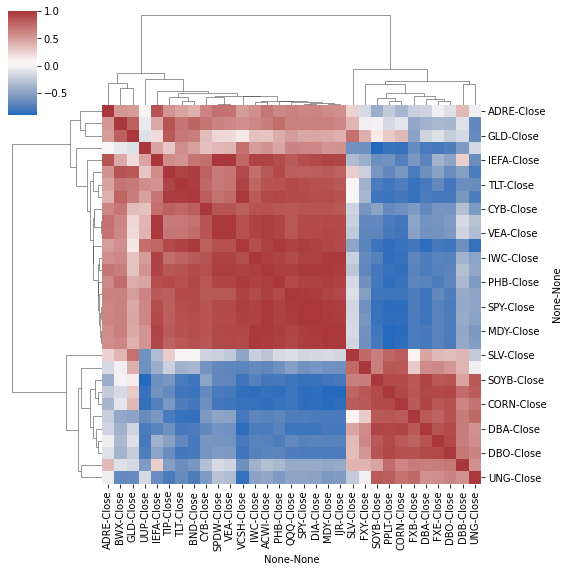

In [10]:
corr = df_close.corr()
sns.clustermap(corr, figsize=(8,8), cmap='vlag')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

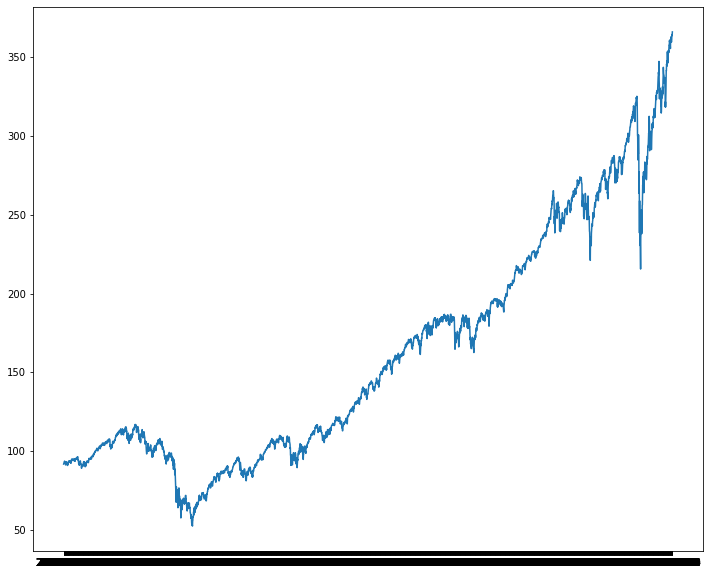

In [94]:
Y = list(df_tot['SPY']['Close'])
X = df_tot.index.to_list()
plt.figure(figsize=(12,10))

# Seaborn

sns.lineplot(x=X, y=Y)
#plt.xaxis.set_major_locator(mdates.YearLocator(1))

# Setting Ticks

plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

# Display

plt.show()

3


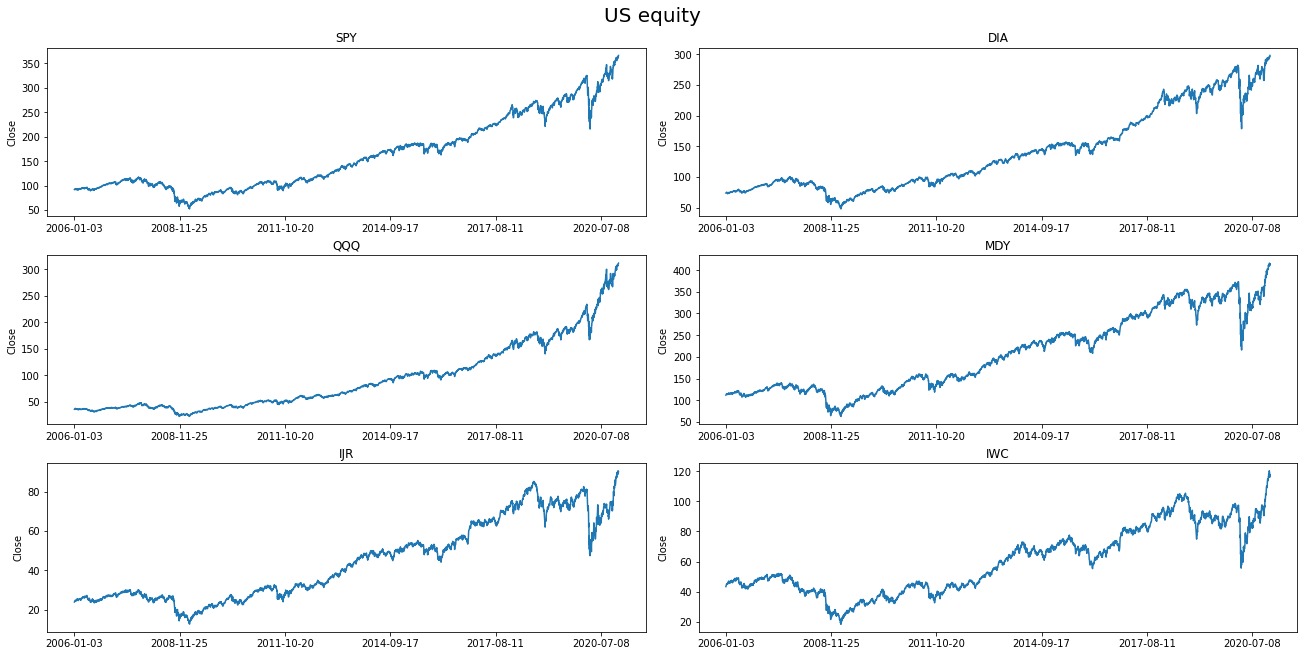

In [131]:
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(18, 9))
fig.suptitle('US equity', size = 20)

for ax, i, sec in zip(axs.flat, ((0,0), (0,1),(1,0), (1,1), (2,0), (2,1)),['SPY', 'DIA', 'QQQ', 'MDY', 'IJR', 'IWC']):
    Y = US_equity[sec]['Close']
    X = US_equity.index.to_list()
    sns.lineplot(ax=axs[i[0],i[1]],x=X, y=Y).set(title=sec)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))

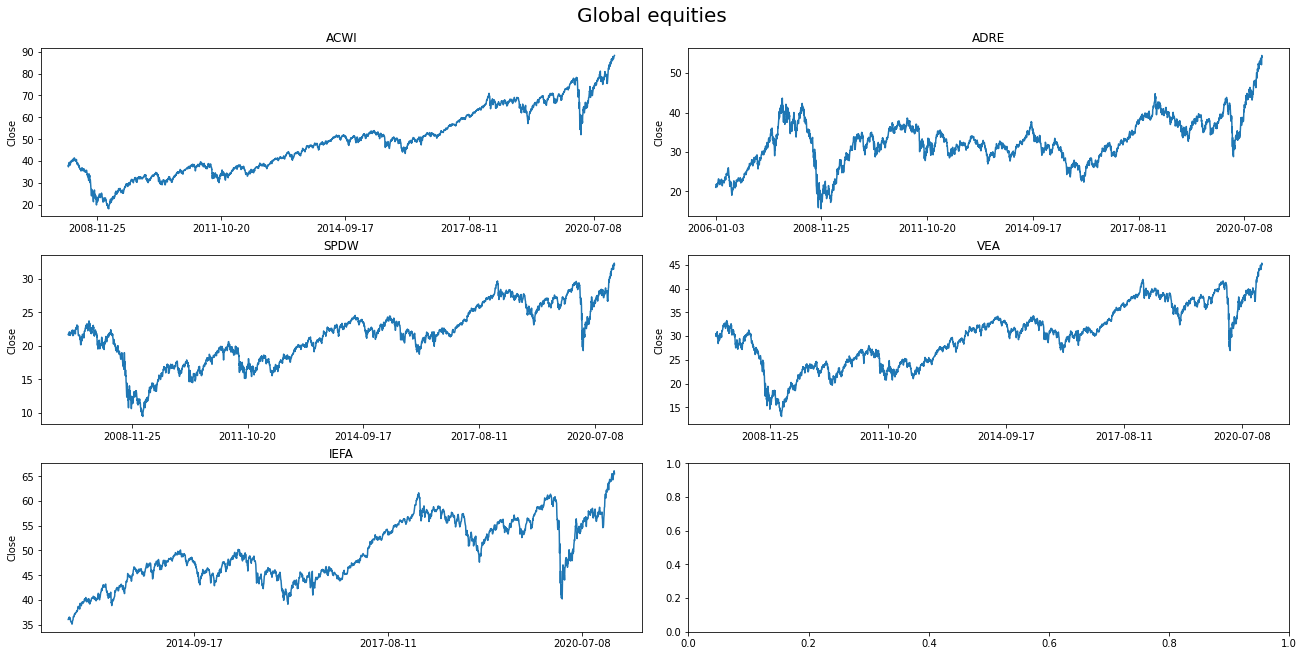

In [116]:
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True,figsize=(18, 9))
fig.suptitle('Global equities', size = 20)

for ax, i, sec in zip(axs.flat, ((0,0), (0,1),(1,0), (1,1), (2,0)),['ACWI', 'ADRE', 'SPDW', 'VEA', 'IEFA']):
    Y = global_equity[sec]['Close']
    X = global_equity.index.to_list()
    sns.lineplot(ax=axs[i[0],i[1]],x=X, y=Y).set(title=sec)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))

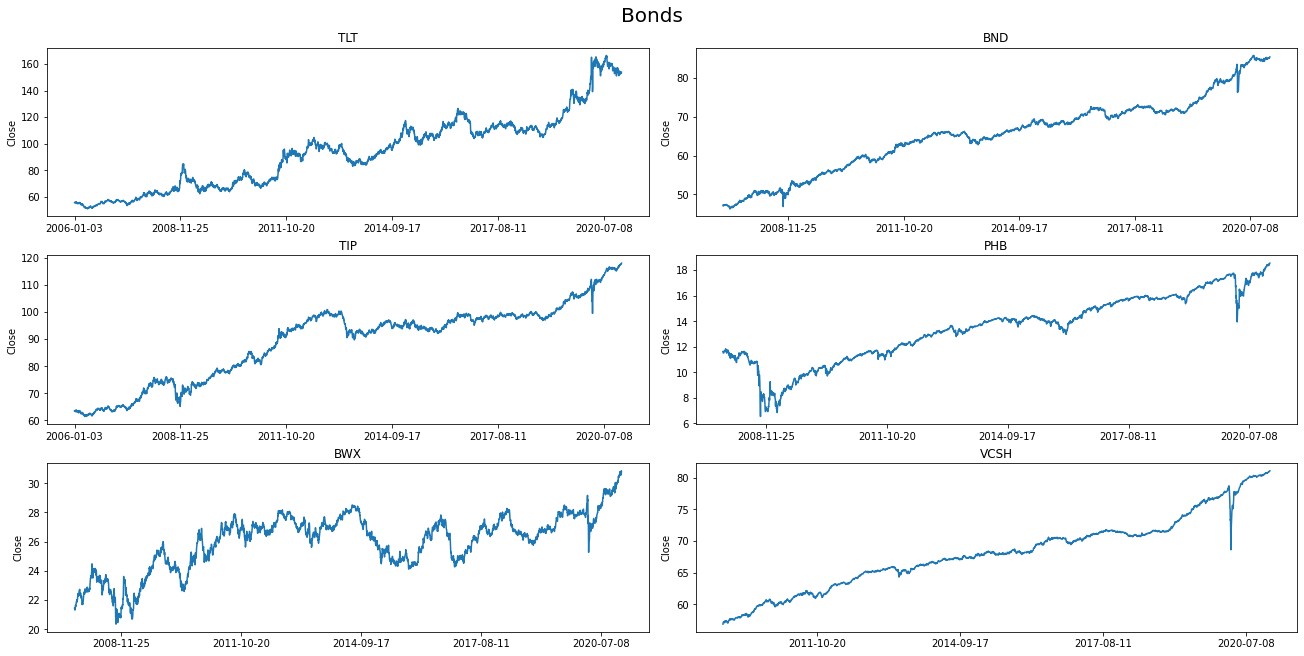

In [117]:
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(18, 9))
fig.suptitle('Bonds', size = 20)

for ax, i, sec in zip(axs.flat, ((0,0), (0,1),(1,0), (1,1), (2,0), (2,1)), ['TLT', 'BND', 'TIP', 'PHB', 'BWX', 'VCSH']):
    Y = bonds[sec]['Close']
    X = bonds.index.to_list()
    sns.lineplot(ax=axs[i[0],i[1]],x=X, y=Y).set(title=sec)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))

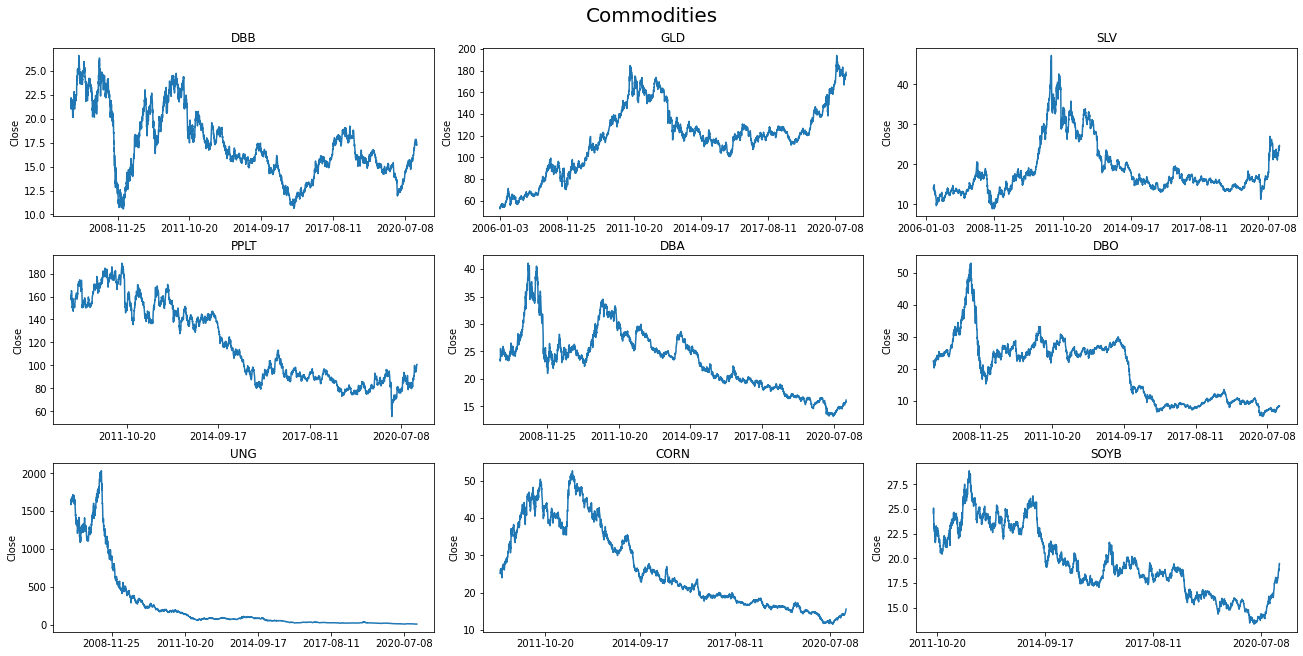

In [118]:
fig, axs = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(18, 9))
fig.suptitle('Commodities', size = 20)


for ax, i, sec in zip(axs.flat, ((0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)), ['DBB', 'GLD', 'SLV', 'PPLT', 'DBA', 'DBO', 'UNG', 'CORN', 'SOYB']):
    Y = commodities[sec]['Close']
    X = commodities.index.to_list()
    sns.lineplot(ax=axs[i[0],i[1]],x=X, y=Y).set(title=sec)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))

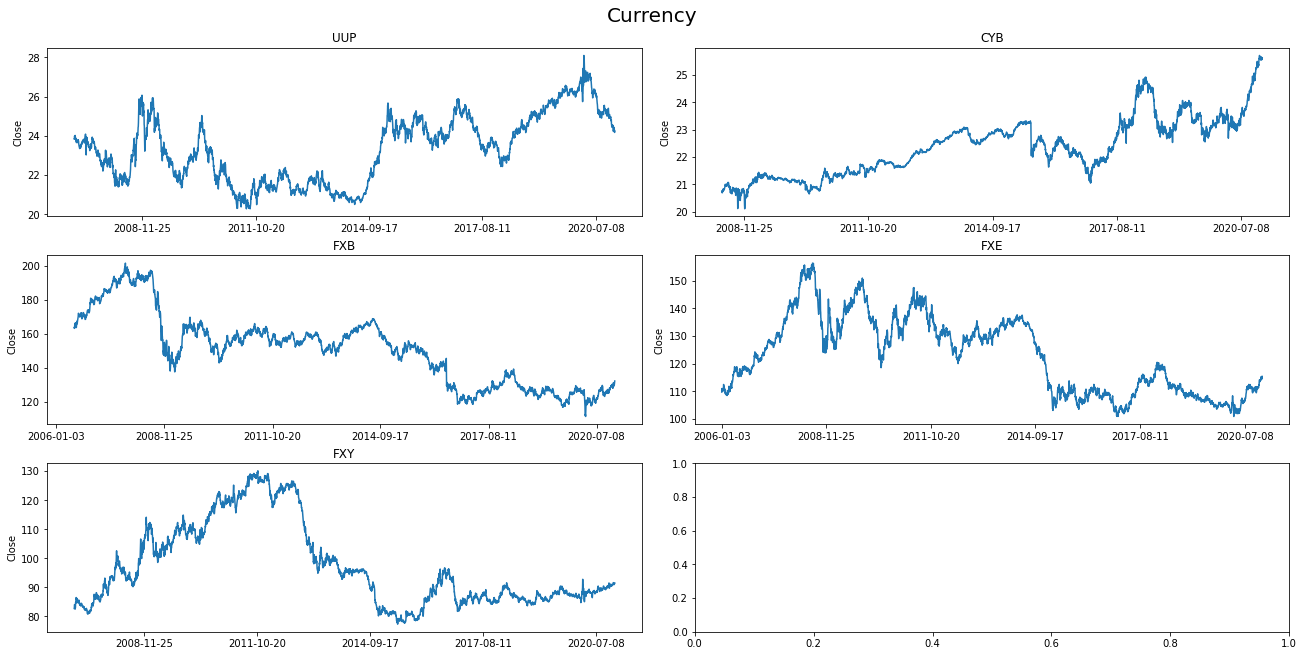

In [119]:
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(18, 9))
fig.suptitle('Currency', size = 20)

for ax, i, sec in zip(axs.flat, ((0,0), (0,1), (1,0), (1,1), (2,0), (2,1),), ['UUP', 'CYB', 'FXB', 'FXE', 'FXY']):
    Y = currencies[sec]['Close']
    X = currencies.index.to_list()
    sns.lineplot(ax=axs[i[0],i[1]],x=X, y=Y).set(title=sec)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

<AxesSubplot:xlabel='Date'>

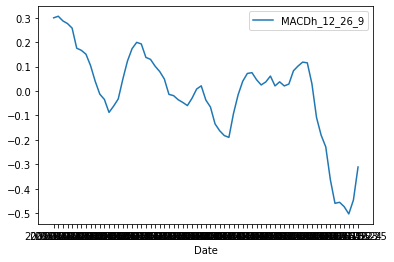

In [130]:
import pandas_ta as ta

help(ta.macd)
macd = ta.macd(US_equity['SPY']['Close'][:100]).dropna()

sns.lineplot(data = macd.drop(columns = ['MACD_12_26_9', 'MACDs_12_26_9']))